[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/MGP/blob/main/GP/Previsão/Reg_linear.ipynb)


# Modelagem e Gestão de Processos


**Prof. Diogo Ferreira de Lima Silva (TEP-UFF)**


## Bibliotecas

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Regressão

Em tarefas de regressão, o programa de computador é solicitado a aprender uma função que gera um rótulo com valor numérico (ex: um número real) dado alguma entrada. 

Para resolver essa tarefa, o algoritmo de aprendizagem precisa gerar uma função:

$$\hat{y} = f:\mathbb{R}^n→\mathbb{R}$$ 

## Regressão Linear

Em um modelo de regressão linear, a função aprendida $f$ apresenta linearidade em termos dos parâmetros.

Exemplo:

$$f_{\vec{w},b}(\vec{x})=w_1x_1+w_2x_2+...+w_nx_n + b$$

$\vec{w}$ e $b$ são os parâmetros (coeficientes, pesos) que desejamos aprender


## Regressão Linear Simples

Para entender a intuição de modelos de regressão linear, iniciaremos com o caso mais simples, quando há apenas um atributo x. 

**Esse modelo é chamado de regressão linear simples.**

Exemplos:

- entender o relacionamento entre os preços de títulos financeiros e o valor do dólar;  
- prever o consumo de energia elétrica com base no tamanho da fábrica.

### Reproducibilidade

Os serão gerados nessa aula aleatoriamente. Porém, sabemos que no computador essa geração é **pseudoaleatória**.

Podemos travar a semente aleatória e, assim, garantiremos a reprodutibilidade dos experimentos.

In [2]:
np.random.seed(0)  

In [3]:
mu, sigma = 150, 50 # média e desvio padrão

# gerando 100 variáveis entre 0 e 2
X = np.random.normal(mu, sigma, size=(100,1)) 

print (X[:10])

[[238.2026173 ]
 [170.00786042]
 [198.93689921]
 [262.04465996]
 [243.37789951]
 [101.13610601]
 [197.50442088]
 [142.43213959]
 [144.83905741]
 [170.5299251 ]]


Associaremos um rótulo a cada entrada x com base em uma função linear acrescida de uma pequena aleatoriedade.

In [4]:
mu_2, sigma_2 = 0, 10

y = 25 + 2 * X + np.random.normal(mu_2, sigma_2, size=(100,1))

### Conjunto de Dados

In [5]:
import pandas as pd
pd.DataFrame(np.concatenate((X,y), axis=1), columns = ["Área", "Preço (1000's)"]).round(2)

,Área,Preço (1000's)
0,238.20,520.24
1,170.01,351.54
2,198.94,410.17
3,262.04,558.78
4,243.38,500.02
...,...,...
95,185.33,393.94
96,150.53,333.77
97,239.29,511.82
98,156.35,359.32


# Gráfico de Dispersão

Plotando os dados

Text(0, 0.5, 'Preço em (1000 R$)')

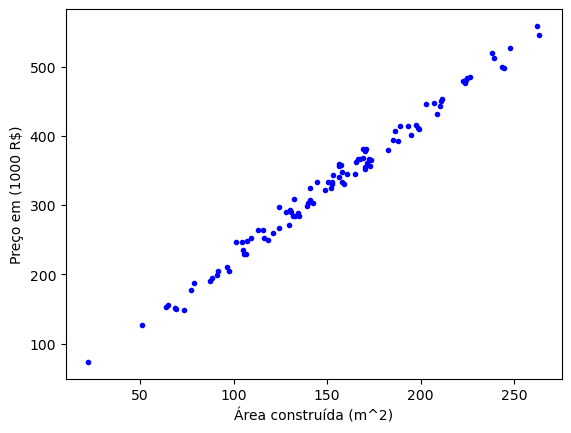

In [6]:
plt.plot(X, y, "b.")
plt.xlabel('Área construída (m^2)')
plt.ylabel('Preço em (1000 R$)')

### Interpretação Estatística

**Ideia central**: É impossível obter uma reta que passe por todos os pontos, porém podemos perceber um relacionamento linear.

Existe uma indicação de que os pontos estariam dispostos aleatoriamente em volta de uma reta. 

Assim, seria razoável assumir que a média da variável aleatória $y$ está relacionada à variável explanatória $x$ por um relacionamento linear

$$E(y│x)=μ_{y|x}= b +w x$$

- $b$ é o intercepto da equação
- $w$ é o coeficiente angular. 


**Interpretação**: Embora a média de y seja uma função linear de $x$, um valor observado qualquer $y^{(i)}$ não cai necessariamente precisamente na reta. 

$$y^{(i)}=b+wx^{(i)} + \epsilon$$

Assim, precisamos estimar $b$ e $w$ de modo a obter o modelo menos custoso. 


### Erro Médio Quadrático

Fazemos isso minimizando a função custo associada ao erro médio quadrático.

$$\min_{w,b}⁡ J(w,b)= \frac{1}{n} \sum_{i=1}^n [( wx^{(i)}+b) - y^{(i)}]^2$$



Como visto em sala de aula, na prática, é comum multiplicar o denominador por $2$ de modo que a função fica:

$$\min_{w,b}⁡ J(w,b)= \frac{1}{2n} \sum_{i=1}^n [( wx^{(i)}+b) - y^{(i)}]^2$$


Isto é feito apenas para facilitar a resolução do sistema de derivadas parciais. **No entanto, os resultados dos parâmetros não serão alterados!**

Vamos criar uma função que calcula o custo total (desvio quadrático médio) utilizando o artifício explicado acima.

In [7]:
def custo_total (x, y, w, b):
    '''
    x é um vetor de n observações;
    y é um verot de n observações
    w é o coeficiente angular da reta
    b é o intercepto
    '''
    
    n = x.shape[0] 
    custo = 0
    for i in range(n):
        f_wb = w * x[i] + b
        custo = custo + (f_wb - y[i])**2 
    J = 1 / (2 * n) * custo
    return J

### Aplicando a função custo

 Vamos calcular o custo de com w = 4 e b = 10


In [8]:
custo_total (X,y, w = 4, b = 10).round(2)

array([47112.75])

## Como encontrar as melhores estimativas de $w$ e $b$?

Sabemos que a nossa função custo é convexa em relação aos parâmetros!

**Estratégias Possíveis**:

1. Buscar a solução fechada (exata)

- A função pode ser minimizada com o sistema de derivadas parciais igualadas a zero

2. Gradiente descendente

### Solução Fechada

Estamos em um problema de otimização não linear sem restrições. 

Além disso, sabe-se que a função custo é **convexa**. Ou seja, qualquer mínimo local será também um mínimo global.

Assim, podemos minimizar $J(w,b)$ usando as condições de primeira ordem de otimização.

Escolheremos as estimativas de parâmetros que satisfaçam:

$$\frac{\partial J}{\partial b} = 0$$

$$\frac{\partial J}{\partial w} = 0$$


## Método dos mínimos quadrados ordinários

Como visto na sala de aula, a solução do sistema acima resulta nas fórmulas do método dos mínimos quadrados ordinários. Estas fórmulas estão presentes em diversos livros de estatística:


$${\hat{w}} = \frac{\sum_{i=1}^{n}{y^{(i)}x^{(i)}}-\frac{\left(\sum_{i=1}^{n}y^{(i)}\right)\left(\sum_{i=1}^{n}x^{(i)}\right)}{n}}{\sum_{i=1}^{n} {x^{(i)}}^{2} -\frac{({\sum_{i=1}^{n}{x^{(i)})}}^2}{n}} = \frac{\sum_{i=1}^{n}{(x^{(i)} - \bar{x})(y^{(i)} - \bar{y})}}{\sum_{i=1}^{n}{(x^{(i)} - \bar{x})^2}}$$


$${\hat{b}}=\bar{y} - {\hat{w}} \bar{x}$$


Assim, obtém-se o modelo regressor $$\hat{y}={\hat{w}}x + \hat{b}$$ que estima o valor médio do modelo de regressão. 

Cada observação satisfaz a relação $y^{(i)}={\hat{b}}+{\hat{w}}x+\epsilon$, onde $\epsilon=y^{(i)}-{\hat{y}}^{(i)}$ é chamado de desvio ou resíduo.

In [9]:
n=X.shape[0]

w_hat = (y.T @ X - (np.sum(y) * np.sum(X)) / n) / (X.T @ X - np.sum(X)**2/n)

b_hat = np.mean(y) - w_hat * np.mean(X)

print(w_hat)
print(b_hat)

[[2.02293969]]
[[22.31057784]]


In [10]:
#Calculando o custo nas estimativas!

custo_total (X,y, w_hat, b_hat).round(2)

array([[52.86]])

# Usando a biblioteca sklearn

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([[2.02293969]]), array([22.31057784]))

Perceba que obtivemos os mesmos valores!

## Gerando exemplos de teste

Vamos usar a mesma metodologia acima para gerar novos dados (que não foram usados previamente no treinamento do modelo).

Esses dados serão então, usados para realizar a previsão.

In [12]:
mu, sigma = 150, 50 # média e desvio padrão
mu_2, sigma_2 = 0, 10
X_teste = np.random.normal(mu, sigma, size=(30,1))
y_teste = 25 + 2 * X_teste + np.random.normal(mu_2, sigma_2, size=(30,1))

Usando os parâmetros estimados acima em lin_reg, podemos prever os preços 

In [13]:
lin_reg.predict(X_teste)

array([[288.40990127],
       [301.53904893],
       [436.97878277],
       [392.02948116],
       [390.49890429],
       [162.20130317],
       [323.29101673],
       [251.10193004],
       [354.06505989],
       [315.82391493],
       [417.81338261],
       [357.83719669],
       [405.28623292],
       [278.57464578],
       [230.2236402 ],
       [284.27624096],
       [324.02996732],
       [364.10158551],
       [554.2738179 ],
       [321.47734739],
       [229.06057686],
       [290.7565176 ],
       [278.86019607],
       [374.45192994],
       [169.90455937],
       [332.15029079],
       [341.58169519],
       [349.23594248],
       [265.33481178],
       [301.68646538]])

**O custo pode ser calculado com nossa função custo total**

In [14]:
# Usando os parâmetros do sklearn 
print (custo_total (X_teste, y_teste, lin_reg.coef_, lin_reg.intercept_))

# Usando os parâmetros da nossa fórmula da função fechada
print (custo_total (X_teste, y_teste, w_hat, b_hat))

[[49.61406678]]
[[49.61406678]]


Também podemos calcular o custo com o sklearn. 

Nesse caso, o valor quadrático é multiplicado por $\frac{1}{n}$ ao invés de $\frac{1}{2n}$ 

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
mean_squared_error(lin_reg.predict(X_teste), y_teste)

99.22813355715259

In [17]:
# Dividindo o valor acima por 2, chegamos  aos nossos valores da função custo_total

mean_squared_error(lin_reg.predict(X_teste), y_teste)/2

49.614066778576294

------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------

## Regressão linear com vários atributos

No caso genérico, uma observação, então, é dada por um vetor de $d$ atributos $\mathbf{x}_i \in \mathbb{R}^p$. 

Considerando o relacionamento entre as variáveis de entrada $\mathbf{x}_i \in \mathbb{R}^p$ e o valor de saída $y\in\mathbb{R}$ linear, temos uma **regressão linear**:

$$y=\mathbf{w}^{T}\mathbf{x} + b + \epsilon$$


Onde:
- $\mathbf{w}^{T}=[w_1,\ldots,\ w_p]$ é um vetor de parâmetros, no qual $w_j$ é o coeficiente a variável independente $x_j$;
- $b$ equivale ao intercepto do modelo de regressão linear simples
- $\epsilon$ é um erro não redutível. 

O coeficiente $w_j$ indica como a variável dependente $y$ muda em média quando $x_j$ é adicionado em uma unidade e as demais variáveis independentes permanecem constantes. 

Esses parâmetros são valores que controlam o comportamento do sistema, muitas vezes chamados de pesos ou coeficientes da regressão.

### Adicionando o intercepto

## Um problema de previsão de demanda com várias variáveis independentes 

Vamos fazer um exercício que envolve múltiplas variáveis independentes. O problema envolve a brasileira por um produto vendido no exterior. Os atributos são:

- Taxa de câmbio
- Preço de venda no site
- Gasto da empresa americana com marketing no Brasil

O conjunto de dados será gerado aleatoriamente abaixo.

In [18]:
# Gerar dados aleatórios
n_amostras = 1000
taxa_cambio = np.random.normal(5, 0.5, n_amostras)  # Taxa de câmbio flutua em torno de 5 BRL/USD
preco_produto_usd = np.random.uniform(20, 100, n_amostras)  # Preço do produto varia de $20 a $100
gasto_marketing_usd = np.random.uniform(1000, 5000, n_amostras)  # Gastos com marketing em dólares


A relação entre a demanda e as variáveis independentes será modelada abaixo (acrescentando um erro aleatório):

In [19]:
demanda_brasil = (
    10000
    - 500 * taxa_cambio  # Impacto negativo de uma taxa de câmbio mais alta
    + 0.3 * (6000 - preco_produto_usd)  # Preço mais baixo pode impulsionar a demanda
    + 0.1 * gasto_marketing_usd  # Mais marketing, mais demanda
    + np.random.normal(0, 300, n_amostras)  # Ruído aleatório
)

In [20]:
# Criando o DataFrame

df = pd.DataFrame({
    'Taxa de Câmbio (USD para BRL)': taxa_cambio,
    'Preço do Produto em USD': preco_produto_usd,
    'Gasto com Marketing em USD': gasto_marketing_usd,
    'Demanda no Brasil (unidades)': demanda_brasil
})

df

,Taxa de Câmbio (USD para BRL),Preço do Produto em USD,Gasto com Marketing em USD,Demanda no Brasil (unidades)
0,4.405570,35.801529,1275.111391,9651.893152
1,4.746592,62.265210,1043.111054,9343.342823
2,4.701843,73.735189,4988.185377,10128.950266
3,4.973716,57.625703,1882.022313,9474.483022
4,4.031860,96.775651,2250.250994,9927.979885
...,...,...,...,...
995,4.368414,44.058152,2382.037194,9992.369685
996,3.611320,79.065981,4324.752634,10204.487975
997,5.575867,40.747321,3215.583738,9097.325783
998,4.705386,97.121631,4104.743188,9827.192578


In [21]:
X = df[['Taxa de Câmbio (USD para BRL)', 'Preço do Produto em USD', 'Gasto com Marketing em USD']]
y = df['Demanda no Brasil (unidades)']

In [25]:
print(f"O tamanho da matriz X é: {X.shape}")

print(f"O tamanho do vetor y é: {y.shape}")

O tamanho da matris X é: (1000, 3)
O tamanho do vetor y é: (1000,)


### Dividindo o conjunto de dados para treinamento e teste

Uma forma prática de usar o conjunto de dados que possuímos consiste em dividi-lo em treinamento e teste.

Isse procedimento é chamado de **Holdout** e já está pré-programado na biblioteca $sklean$.

Primeiro, ajustamos a regressão usando só os dados de treinamento.

Em seguida, usamos os dados de teste para realizar a previsão e testar se "acertamos" a demanda.

In [27]:
from sklearn.model_selection import train_test_split

In [32]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)



print(f"O tamanho da matriz X_treino é: {X_treino.shape}")
print(f"O tamanho do vetor y_treino é: {y_treino.shape}")

print("-------------------------------")
print(f"O tamanho da matriz X_teste é: {X_teste.shape}")
print(f"O tamanho do vetor y_teste é: {y_teste.shape}")

O tamanho da matriz X_treino é: (800, 3)
O tamanho do vetor y_treino é: (800,)
-------------------------------
O tamanho da matriz X_teste é: (200, 3)
O tamanho do vetor y_teste é: (200,)


In [33]:
# Treinamento do modelode regressão linear

modelo = LinearRegression()
modelo.fit(X_treino, y_treino)


print(f"w = {modelo.coef_}")
print(f"b = {modelo.intercept_}")

w = [-4.82085253e+02 -6.17916131e-01  9.38707640e-02]
b = 11735.46231716599


In [38]:
# Previsão da demanda no conjunto de teste
y_pred = modelo.predict(X_teste)

# Calcular o erro quadrático médio (EQM)
MSE = mean_squared_error(y_teste, y_pred)
print('Erro Quadrático Médio:', MSE)

print('Erro Absoluto Médio:', mean_absolute_error(y_teste, y_pred))

Erro Quadrático Médio: 93309.82353643823
Erro Absoluto Médio: 233.77649961085785


Perceba que o método $modelo.predict()$ está apenas aplicando o produto interno $\vec{w}\cdot\vec{x}$ e somando $b$

Veja:

In [39]:
# Previsão da demanda no conjunto de teste
y_pred = modelo.coef_.dot(X_teste.T) + modelo.intercept_

# Calcular o erro quadrático médio (EQM)
MSE = mean_squared_error(y_teste, y_pred)
print('Erro Quadrático Médio:', MSE)
print('Erro Absoluto Médio:', mean_absolute_error(y_teste, y_pred))

Erro Quadrático Médio: 93309.82353643823
Erro Absoluto Médio: 233.77649961085785
